In [ ]:
import os #os - để đọc tệp và cấu trúc thư mục
import numpy as np #hỗ trợ cho việc tính toán các mảng nhiều chiều với một số phép toán ma trận bên ngoài TensorFlow
import matplotlib.pyplot as plt #để vẽ biểu đồ và hiển thị hình ảnh trong dữ liệu đào tạo và xác thực

In [ ]:
import tensorflow as tf #Các hàm được dựng sẵn trong thư viện cho phép TensorFlow xây dựng được nhiều neural network.
from tensorflow.keras.preprocessing.image import ImageDataGenerator #tạo thêm data bằng cách scale, rotation ,...để thêm data train
from keras.preprocessing import image 

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' #tạo biến URL bằng đường dẫn

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True) #Lấy file từ biến URL

68616192/68606236 [==============================] - 0s 0us/step


Chỉ định các biến với đường dẫn tệp thích hợp cho các tập huấn luyện và xác nhận.

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # thư mục có hình ảnh chó để huấn luyện
train_dogs_dir = os.path.join(train_dir, 'dogs')  # thư mục có hình ảnh mèo để huấn luyện
validation_cats_dir = os.path.join(validation_dir, 'cats')  # thư mục có hình ảnh mèo để xác thực, thẩm định
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # thư mục có hình ảnh chó để xác thực, thẩm định

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir)) #tạo biến đêm số lượng ảnh mèo để train
num_dogs_tr = len(os.listdir(train_dogs_dir)) #tạo biến đêm số lượng ảnh chó để train

num_cats_val = len(os.listdir(validation_cats_dir)) #tạo biến đêm số lượng ảnh mèo để xác thực, thẩm định
num_dogs_val = len(os.listdir(validation_dogs_dir)) #tạo biến đêm số lượng ảnh chó để xác thực, thẩm định

total_train = num_cats_tr + num_dogs_tr # tạo biến tổng cộng số lượng ảnh chó mèo để train
total_val = num_cats_val + num_dogs_val # tạo biến tổng cộng số lượng ảnh chó mèo để xác thực, thẩm định

In [ ]:
print('total training cat images:', num_cats_tr) #in ra số lượng ảnh mèo để train
print('total training dog images:', num_dogs_tr) # in ra số lượng chó để train 

print('total validation cat images:', num_cats_val) #in ra số lượng ảnh mèo để xác thực, thẩm định
print('total validation dog images:', num_dogs_val) #in ra số lượng ảnh chó để xác thực, thẩm định
print("--")
print("Total training images:", total_train) # in ra tổng số lượng ảnh train
print("Total validation images:", total_val) #in ra tổng số lượng ảnh xác thực, thẩm định

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Để thuận tiện thì set các giá trị vào biến

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 

Tăng cường dữ liệu

In [ ]:
# các câu lệnh này sẽ đưa hình ảnh về dưới dạng lưới với 1 hàng và 5 cột trong đó các hình ảnh được đặt trong mỗi cột.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Lật theo chiều ngang

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


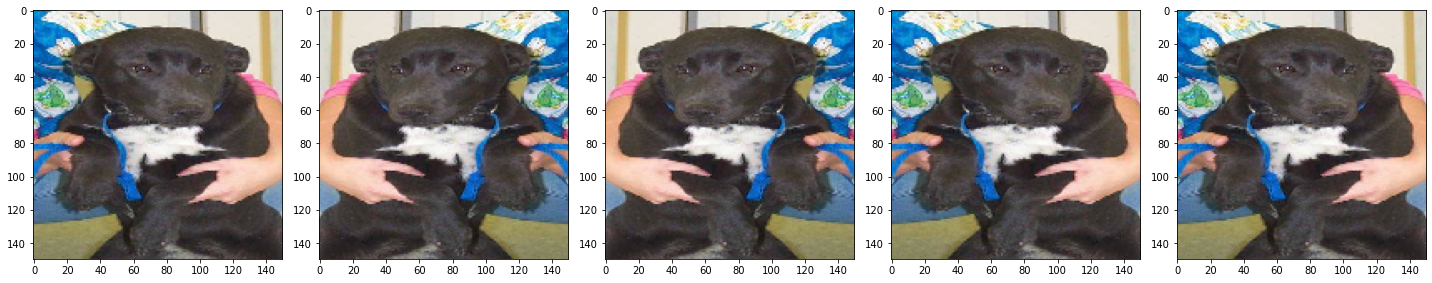

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Xoay ảnh

In [ ]:
#Tính năng nâng xoay sẽ xoay ngẫu nhiên hình ảnh lên đến một số độ được chỉ định, ở đây sẽ đặt nó thành 45 độ.
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


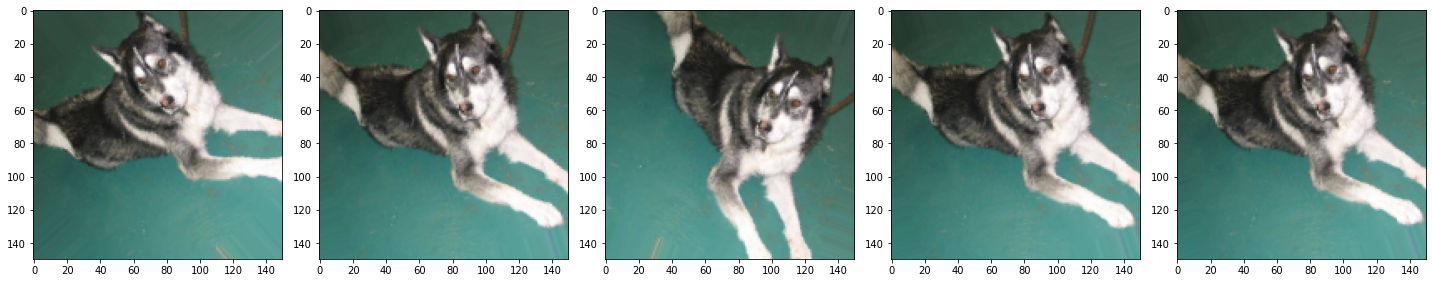

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

zoom ảnh

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


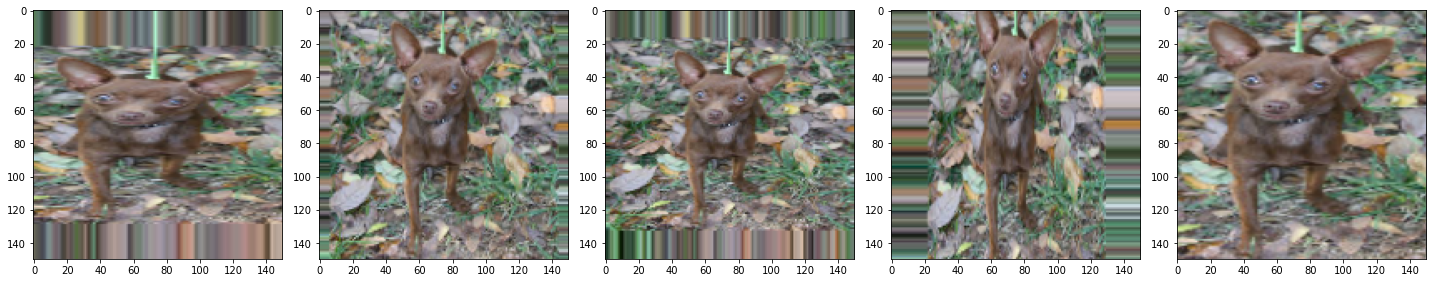

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Áp dụng 3 kỹ thuật lật, xoay, zoom.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


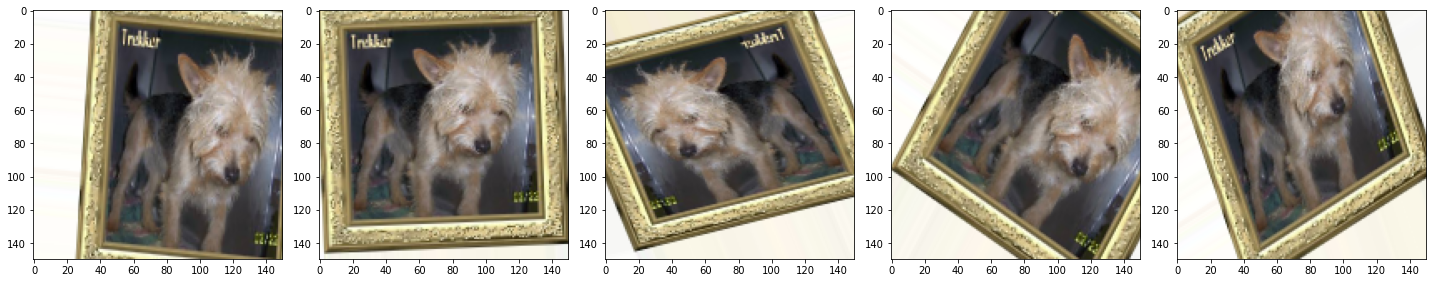

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
def build_model():
  model = tf.keras.models.Sequential([ #Khởi tạo models Sequential, Conv2D là convolution dùng để lấy feature từ ảnh, filters : số filter của convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    #kernel_size : kích thước window search trên ảnh, strides : số bước nhảy trên ảnh, activation : chọn activation như linear, softmax, relu, tanh, sigmoid. 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #MaxPooling2D lấy max với từng size

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),#ReLU đơn giản lọc các giá trị < 0
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),#ReLU đơn giản lọc các giá trị < 0
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), #Dense layer này cũng như một layer neural network bình thường.
    tf.keras.layers.Dense(2, activation='softmax') #Mô hình sẽ xuất ra xác suất lớp cho hai lớp - chó và mèo - bằng cách sử dụng softmax.
  ])
  
  return model

In [ ]:
model = build_model() # khởi tạo model

model.compile(optimizer='adam', #sử dụng trình adam tối ưu hóa
              loss='sparse_categorical_crossentropy', #chúng ta đang xuất ra một phân loại softmax, nên chúng ta sẽ sử dụng sparse_categorical_crossentropy làm hàm mất mát.
              metrics=['accuracy']) #muốn xem độ chính xác của quá trình đào tạo và xác thực trên từng lần đào tạo.

In [ ]:
model.summary() #Tóm tắt mô hình

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Đào tạo mô hình

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10) #để quyết định khi nào thì nên dừng lại quá trình này để tránh hiện tượng overfitting.


EPOCHS = 100 #Epoch là số lần duyệt qua hết số lượng mẫu trong tập huấn luyện.
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
    callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
20/20 [==============================] - 29s 830ms/step - loss: 0.7249 - accuracy: 0.4995 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 17s 831ms/step - loss: 0.6930 - accuracy: 0.4950 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 17s 880ms/step - loss: 0.6900 - accuracy: 0.5350 - val_loss: 0.6736 - val_accuracy: 0.5490
Epoch 4/100
20/20 [==============================] - 18s 888ms/step - loss: 0.6896 - accuracy: 0.5560 - val_loss: 0.6792 - val_accuracy: 0.5800
Epoch 5/100
20/20 [==============================] - 18s 900ms/step - loss: 0.6865 - accuracy: 0.5540 - val_loss: 0.6779 - val_accuracy: 0.5380
Epoch 6/100
20/20 [==============================] - 22s 1s/step - loss: 0.6636 - accuracy: 0.5915 - val_loss: 0.6866 - val_accuracy: 0.5470
Epoch 7/100
20/20 [==============================] - 17s 834ms/step - loss: 0.6643 - accuracy: 0.5895 - val_loss: 0.6599 - val_accuracy: 0.

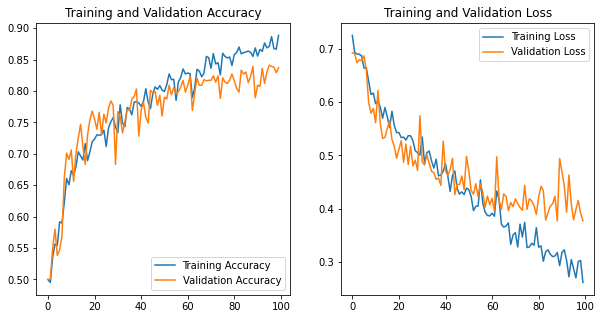

In [ ]:
def plot_history(history):
  
  acc = history.history['accuracy']#tạo biến gán bằng lịch sử đào tạo mô hình train
  val_acc = history.history['val_accuracy'] #tạo biến gán bằng lịch sử đào tạo mô hình xác thực, thẩm định

  loss = history.history['loss'] #tạo biến gán bằng lịch sử hàm mất mát từ mô hình train
  val_loss = history.history['val_loss'] #tạo biến gán bằng lịch sử hàm mát từ mô hình xác thực, thẩm định

  epochs_range = np.arange(len(history.history['loss']))

  plt.figure(figsize=(10, 5))#tạo cửa sổ chứa đồ thị
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy') #Vẽ đồ thị tuyến tính training accuracy trong không gian 2 chiều.
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')  #Vẽ đồ thị tuyến tính validation accuracy trong không gian 2 chiều.
  plt.legend(loc='lower right')# tạo dòng ghi chú ở phía dưới bên phải đồ thị
  plt.title('Training and Validation Accuracy')#tên biểu đồ training and validation accuracy

  plt.subplot(1, 2, 2)#Tạo các trục trong một phần của cửa sổ đồ họa
  plt.plot(epochs_range, loss, label='Training Loss') #Vẽ đồ thị tuyến tính training loss trong không gian 2 chiều.
  plt.plot(epochs_range, val_loss, label='Validation Loss')#Vẽ đồ thị tuyến tính validation loss trong không gian 2 chiều.
  plt.legend(loc='upper right')# tạo dòng ghi chú ở phía trên bên phải đồ thị
  plt.title('Training and Validation Loss')#tên biểu đồ training and validation loss
  #plt.savefig('./foo.png')
  plt.show()
  
########################
  
plot_history(history)

In [ ]:
print('Maximum of training accuracy is {:2.2f}, while maximum of validation accuracy is {:2.2f}'.
      format(np.max(history.history['accuracy']), np.max(history.history['val_accuracy']) ))

Maximum of training accuracy is 0.89, while maximum of validation accuracy is 0.84


[[0. 1.]]
dog


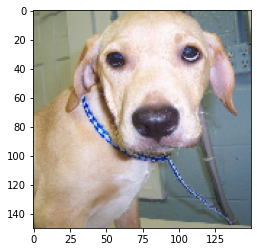

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
tested_image = image.load_img('/content/drive/MyDrive/data/dog.4132.jpg', target_size=(150,150)) # tạo biến đưa đường dẫn ảnh vào với size =150
plt.imshow(tested_image)
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims((tested_image),axis=0)
output = model.predict(tested_image)
print(output)
train_data_gen.class_indices
if output[0][0]==1:
  prediction = 'cat'
else:
  prediction = 'dog'
print(prediction)

In [ ]:

model.save('model_keras.h5')